Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB

Missing values before cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num

C:\Users\anaah\AppData\Local\Temp\ipykernel_9824\340415436.py:37: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2



Target distribution:
 num
0    164
1    139
Name: count, dtype: int64


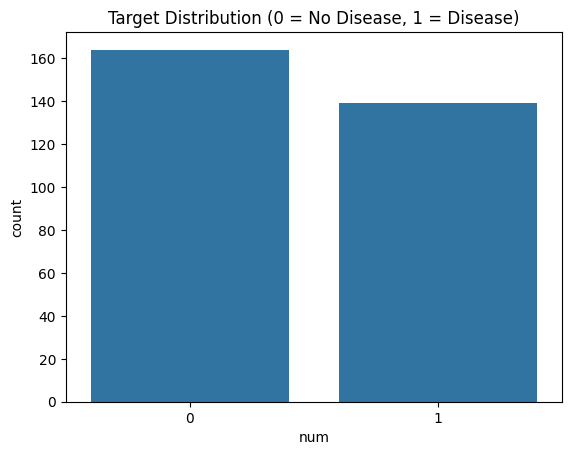

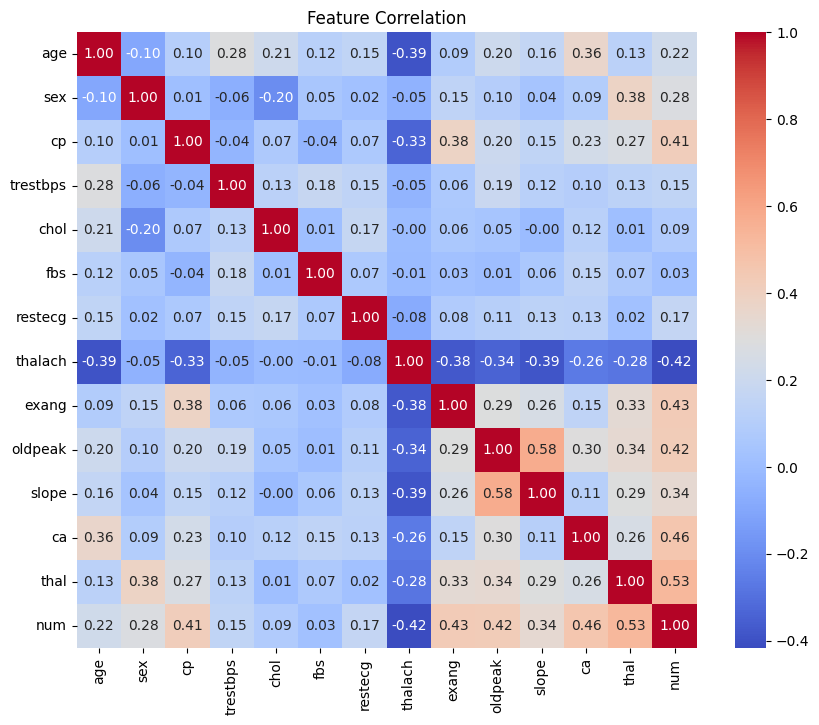


Cleaned dataset saved to ../results/cleaned_heart.csv


In [13]:
# ============================================================
# 01_data_preprocessing.ipynb
# Load, clean, and prepare the Heart Disease dataset
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# ---- Cell 2: Load dataset from UCI ----
# Fetch Cleveland Heart Disease dataset (UCI ID 45)
heart_disease = fetch_ucirepo(id=45)

# Separate features and target
X_raw = heart_disease.data.features
y_raw = heart_disease.data.targets

# Merge into single DataFrame
df = pd.concat([X_raw, y_raw], axis=1)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

# ---- Cell 3: Check basic info & missing values ----
df.info()
print("\nMissing values before cleaning:\n", df.isnull().sum())

# ---- Cell 4: Handle missing values & type conversion ----
# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert all to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Check again
print("\nMissing values after conversion:\n", df.isnull().sum())

# ---- Cell 5: Summary statistics ----
display(df.describe().T)

# ---- Cell 6: Map target to binary ----
target_col = 'num'

# Convert to binary: 0 = no disease, 1 = disease
df[target_col] = df[target_col].apply(lambda v: 1 if v > 0 else 0)

print("\nTarget distribution:\n", df[target_col].value_counts())

# ---- Cell 7: Visual EDA ----
sns.countplot(x=target_col, data=df)
plt.title('Target Distribution (0 = No Disease, 1 = Disease)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# ---- Cell 8: Save cleaned dataset for next notebooks ----
import os
os.makedirs('../results', exist_ok=True)
df.to_csv('../results/cleaned_heart.csv', index=False)
print("\nCleaned dataset saved to ../results/cleaned_heart.csv")
